# What factors affect a loan’s outcome status?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
loan = pd.read_csv('prosperLoanData.csv')
loan.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
# Taking Average of Upper and Lower Credit Score
loan['CreditScore'] = (loan['CreditScoreRangeLower'] + loan['CreditScoreRangeUpper'])/2
#remove not available emloyment status from our data
loan = loan[loan.EmploymentStatus != 'Not available']

In [4]:
#working in the variables that helps me to Answer my Qustion.
df=loan[['CreditScore','Term','LoanStatus','BorrowerAPR','IncomeRange','LenderYield','EstimatedReturn','ProsperRating (numeric)','ProsperScore','ListingCategory (numeric)','BorrowerState','EmploymentStatus','IsBorrowerHomeowner','LoanOriginalAmount','Investors']]
df.head(2)

,CreditScore,Term,LoanStatus,BorrowerAPR,IncomeRange,LenderYield,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,LoanOriginalAmount,Investors
0,649.5,36,Completed,0.16516,"$25,000-49,999",0.138,NaN,NaN,NaN,0,CO,Self-employed,True,9425,258
1,689.5,36,Current,0.12016,"$50,000-74,999",0.082,0.0547,6.0,7.0,2,CO,Employed,False,10000,1


In [5]:
df.isnull().sum()

CreditScore                    589
Term                             0
LoanStatus                       0
BorrowerAPR                     25
IncomeRange                      0
LenderYield                      0
EstimatedReturn              23737
ProsperRating (numeric)      23737
ProsperScore                 23737
ListingCategory (numeric)        0
BorrowerState                 3127
EmploymentStatus              2255
IsBorrowerHomeowner              0
LoanOriginalAmount               0
Investors                        0
dtype: int64

In [6]:
na_counts = df.drop(['Term','LoanStatus','IsBorrowerHomeowner','BorrowerAPR','LenderYield','ListingCategory (numeric)','IncomeRange','Investors','LoanOriginalAmount'], axis=1).isna().sum()
print(na_counts)

CreditScore                  589
EstimatedReturn            23737
ProsperRating (numeric)    23737
ProsperScore               23737
BorrowerState               3127
EmploymentStatus            2255
dtype: int64


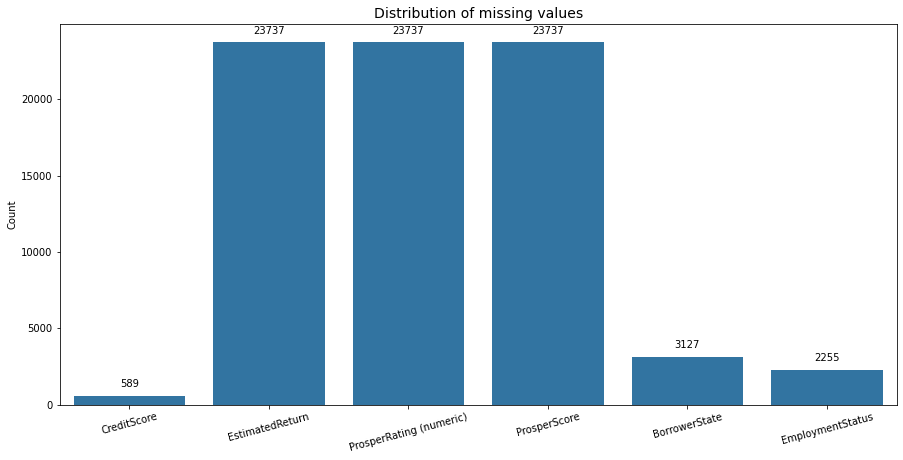

In [7]:
#counting missing values plot
plt.figure(figsize=[15,7])
color_base=sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts,color=color_base)
plt.xticks(rotation=15) 
plt.ylabel('Count')
plt.title('Distribution of missing values',fontsize=14)
# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+1100, count, ha = 'center', va='top')

In [8]:
df = df.dropna()

In [9]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(84853, 15)
CreditScore                  float64
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
IncomeRange                   object
LenderYield                  float64
EstimatedReturn              float64
ProsperRating (numeric)      float64
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
EmploymentStatus              object
IsBorrowerHomeowner             bool
LoanOriginalAmount             int64
Investors                      int64
dtype: object
    CreditScore  Term            LoanStatus  BorrowerAPR     IncomeRange  \
1         689.5    36               Current      0.12016  $50,000-74,999   
3         809.5    36               Current      0.12528  $25,000-49,999   
4         689.5    36               Current      0.24614       $100,000+   
5         749.5    60               Current      0.15425       $100,000+   
6         689.5    36               Cur

### What is the structure of your dataset?

There are 84853 loan in the dataset with 15 features (CreditScore', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'EmploymentStatus', ''IncomeRange'', 'LoanOriginalAmount',
       'Investors'). Most variables are numeric and categorical.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the loan’s outcome status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that credit score will have the strongest effect on each Loan outcome status:the more stable Employment, the higher the loan outcome status.

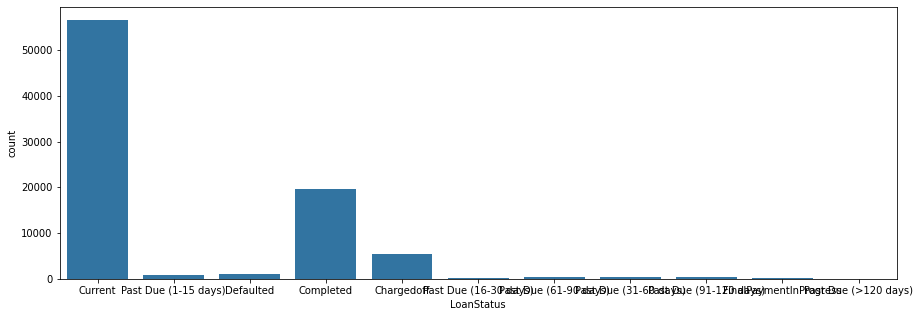

In [10]:
plt.figure(figsize=[15,5])
base_color=sb.color_palette()[0]
sb.countplot(data=df, x='LoanStatus', color=base_color);

As we see, It's very destroyed plot so we gonna make some clean up to make the data more clear.

In [11]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [12]:
#melt all past due together
df['LoanStatus']=df['LoanStatus'].apply(lambda x:x.split('(')[0])
df.LoanStatus.value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Past Due                   2067
Defaulted                  1005
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

In [13]:
ordinal_var_dict = {'Term': [12, 36, 60],
                    'LoanStatus': ['Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 'Past Due '],
                   'IncomeRange': ['Not employed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                'ListingCategory (numeric)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Part-time', 'Retired','Other','Not employed']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

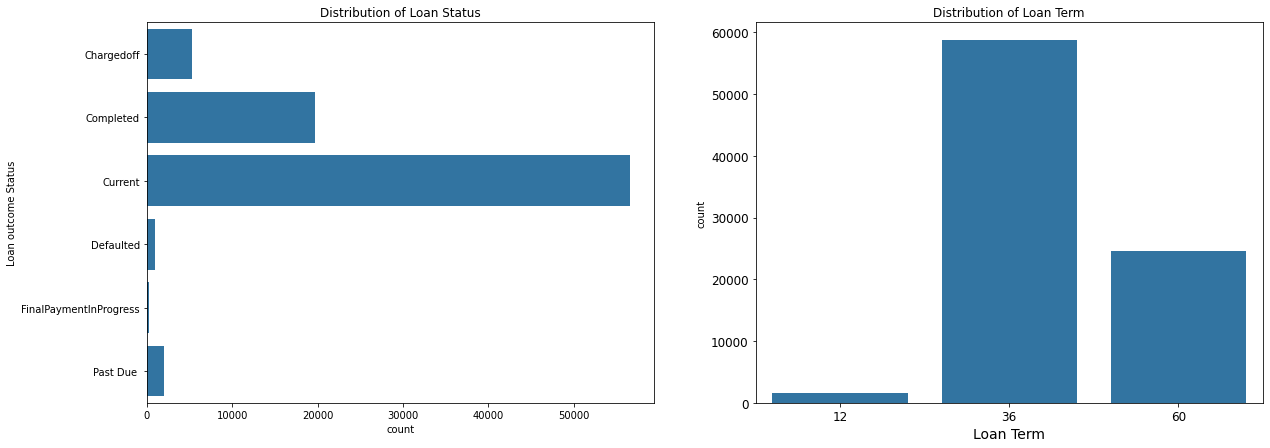

In [57]:
plt.figure(figsize=[20,7])
plt.subplot(1,2,1)
base_color=sb.color_palette()[0]
sb.countplot(data=df, y='LoanStatus', color=base_color);
#plt.xscale('log')
#plt.xticks([10, 100, 1000, 10000,50000], [10, '100', '1000', '10000','50000'])
plt.ylabel('Loan outcome Status')
plt.title("Distribution of Loan Status");
plt.subplot(1,2,2)
sb.countplot(data = df, x = 'Term', color = base_color);
plt.xlabel('Loan Term',fontsize = 14);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.title("Distribution of Loan Term");
plt.savefig("Dist of loan status and term.png")

As we can see, most of loans is in current status, and term tends to be 36 months.

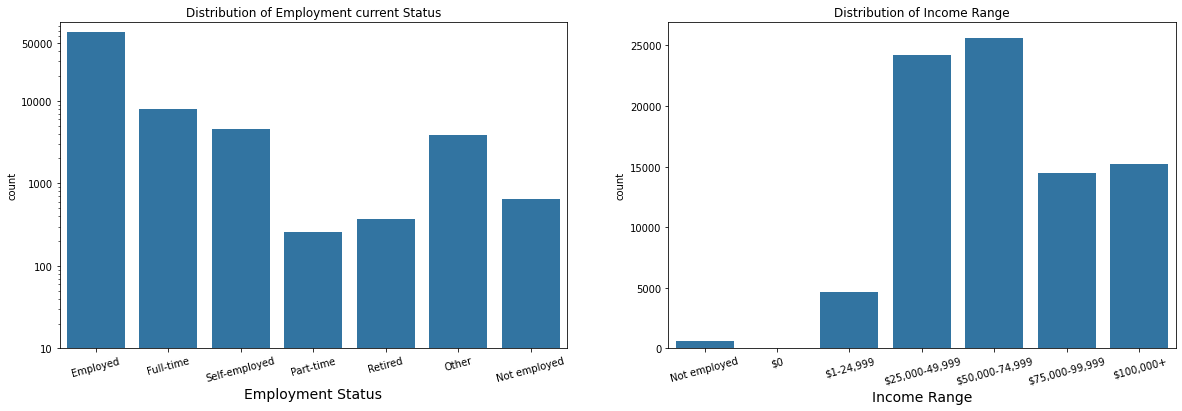

In [58]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
base_color=sb.color_palette()[0]
sb.countplot(data=df, x='EmploymentStatus', color=base_color);
plt.yscale('log')
plt.yticks([10, 100, 1000, 10000,50000], [10, '100', '1000', '10000','50000'])
plt.title("Distribution of Employment current Status");
plt.xlabel('Employment Status', fontsize = 14)
plt.xticks(rotation=15) 
plt.subplot(1,2,2)
sb.countplot(data=df, x='IncomeRange', color=base_color);
plt.xticks(rotation=15) 
plt.xlabel('Income Range', fontsize = 14)
plt.title("Distribution of Income Range");
plt.savefig("Dist of loan employment status and Income Range.png")

as we see in first plot the most loans is in employment direction, and from second plot the Middle class people attends to present more loans.

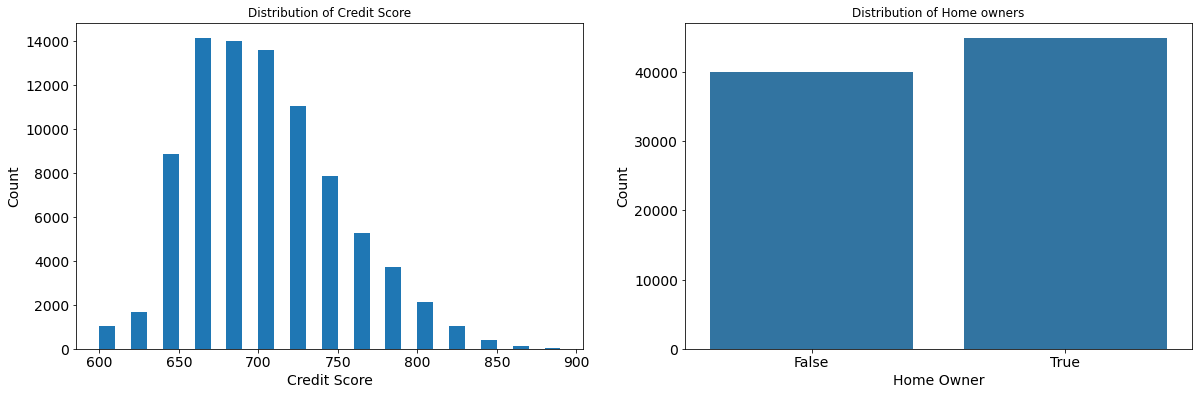

In [59]:
plt.figure(figsize = [20, 6])
plt.subplot(1,2,1)
bins=np.arange(600,890+10,10)
plt.hist(data = df, x = 'CreditScore', bins = bins);
plt.xticks(fontsize =14);
plt.yticks(fontsize =14);
plt.xlabel('Credit Score', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.title('Distribution of Credit Score');

plt.subplot(1,2,2)
sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color);
plt.xlabel('Home Owner', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.xticks(fontsize =14);
plt.yticks(fontsize =14);
plt.title("Distribution of Home owners");
plt.savefig("Distributions of Credit Score and Home owners.png")

the Credit score is normally distributed and its bins are discrete in nature, and from about 660 to 700 we get the max credit score propotions, and from the second plot we could say it's evenly distributed.

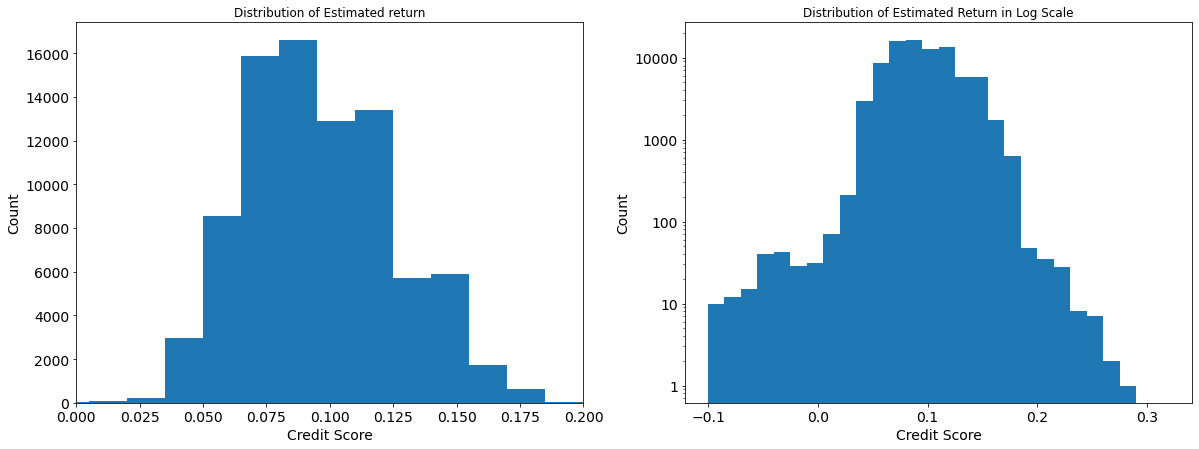

In [60]:
bins=np.arange(-.1,0.3+.025,0.015)
plt.figure(figsize=[20,7])
plt.subplot(1,2,2)
plt.hist(data = df, x = 'EstimatedReturn', bins = bins);
#plt.xlim((0.0,0.2))
plt.yscale('log')
plt.yticks([1, 10, 100,1000,10000], [1,'10', '100', '1000', '10000'],fontsize=14)
plt.xticks(fontsize =14);
plt.xlabel('Credit Score', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.title('Distribution of Estimated Return in Log Scale');

plt.subplot(1,2,1)
plt.hist(data = df, x = 'EstimatedReturn', bins = bins);
plt.xlim((0.0,0.2))
#plt.yscale('log')
plt.xticks(fontsize =14);
plt.yticks(fontsize =14);
plt.xlabel('Credit Score', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.title('Distribution of Estimated return');
plt.savefig("Distribution of Estimated return.png")

It's normally distributed with mean arount 10%.

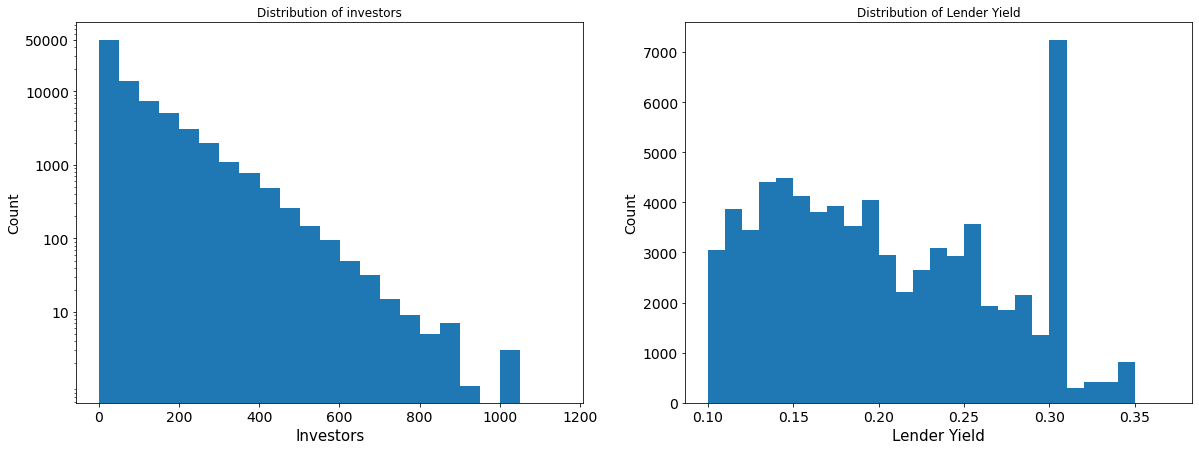

In [62]:
plt.figure(figsize=[20,7])
plt.subplot(1,2,1)
bins=np.arange(1,1200,50)
plt.hist(data = df, x = 'Investors', bins = bins);
plt.yscale('log')
plt.yticks([10, 100, 1000, 10000,50000], [10, '100', '1000', '10000','50000'])
#plt.xlim((0,250))
plt.xticks(fontsize =14);
plt.yticks(fontsize =14);
plt.xlabel('Investors', fontsize = 15);
plt.ylabel('Count', fontsize = 14);
plt.title('Distribution of investors');
plt.subplot(1,2,2)
bins=np.arange(0.1,0.35+.025,0.01)
plt.hist(data = df, x = 'LenderYield',bins=bins);
#plt.xlim((0,250))
plt.xticks(fontsize =14);
plt.yticks(fontsize =14);
plt.xlabel('Lender Yield', fontsize = 15);
plt.ylabel('Count', fontsize = 14);
plt.title('Distribution of Lender Yield');
plt.savefig("Distributions of Inverstors and Lender Yield.png")

From first distribution we get that most of loans get lower number of investors, and the second one we got that most lender yield in 30%.

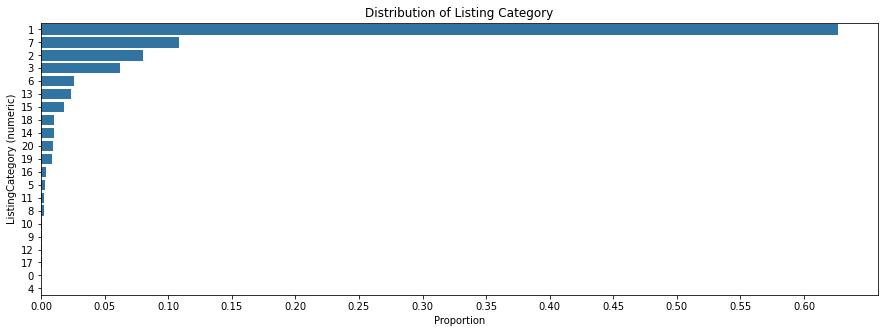

In [63]:
list_order =df['ListingCategory (numeric)'].value_counts().index
num_lists = df.shape[0]
max_count = df['ListingCategory (numeric)'].value_counts().max()
max_prop = max_count / num_lists

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.figure(figsize=[15, 5]);
sb.countplot(data = df, y = 'ListingCategory (numeric)', color = sb.color_palette()[0], order = list_order)
plt.xticks(tick_props * num_lists, tick_names);
plt.xlabel('Proportion');
plt.title('Distribution of Listing Category');
plt.savefig("Distributions of Listing Category.png")

The num 1 related to Debt consolidation and it takes over 60% of loan !


I think that's because of country goverment politics.



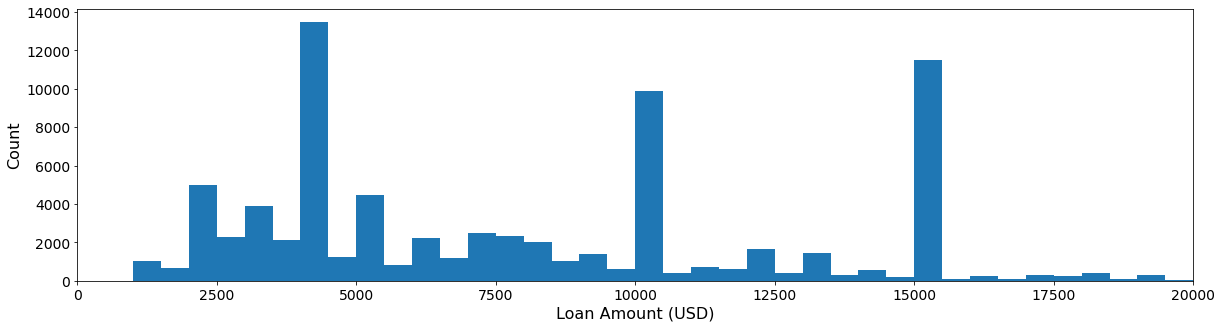

In [64]:
plt.figure(figsize = [20, 5])
plt.hist(data = df, x ='LoanOriginalAmount', bins= np.arange(0, df['LoanOriginalAmount'].max()+500,500));
plt.xlabel('Loan Amount (USD)', fontsize = 16);
plt.xlim((0,20000))
plt.ylabel('Count', fontsize = 16);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.savefig("Distributions of Loan Amount.png")

As we see, It's a multi peaks distribution.

-------------------------------------

# Bivariate Exploration of Data

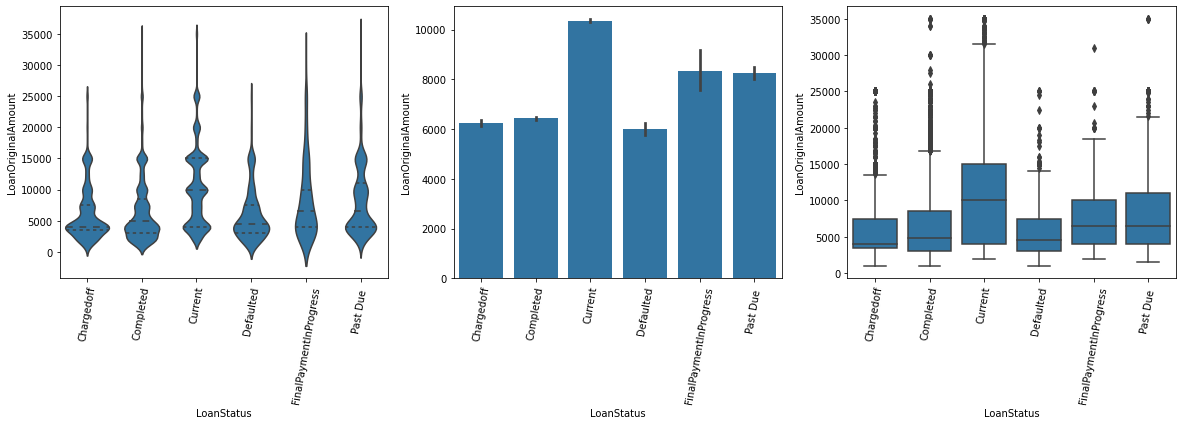

In [65]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sb.violinplot(data=df,x='LoanStatus',y='LoanOriginalAmount',color=base_color,inner='quartile');
plt.xticks(rotation=80);
plt.subplot(1,3,2)
sb.barplot(data=df,x='LoanStatus',y='LoanOriginalAmount',color=base_color);
plt.xticks(rotation=80);
plt.subplot(1,3,3)
sb.boxplot(data=df,x='LoanStatus',y='LoanOriginalAmount',color=base_color);
plt.xticks(rotation=80);
plt.savefig("Relation between Loan Status and amount.png")

As we can see, higher loan amount tends to have more loans of current status.

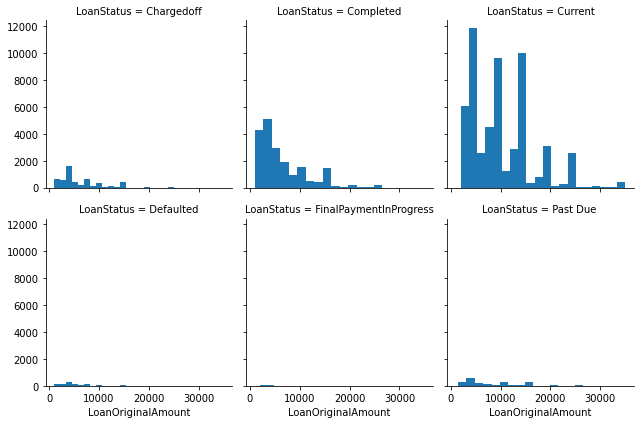

In [66]:
g=sb.FacetGrid(data=df,col='LoanStatus',col_wrap=3)
g.map(plt.hist,'LoanOriginalAmount',bins=20);
plt.savefig("Relation2 between Loan Status and amount.png")

This plots accept the idea of loans in current status and tends to have higher Loan Amount.

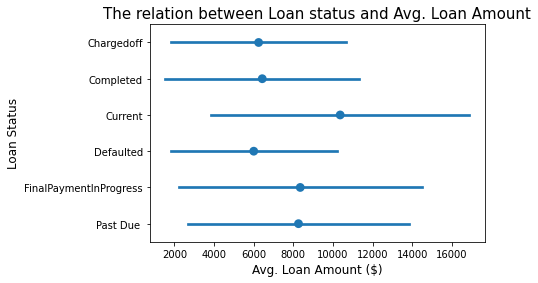

In [23]:
sb.pointplot(data=df,y='LoanStatus',x='LoanOriginalAmount',ci='sd',linestyles="");
plt.xlabel('Avg. Loan Amount ($)',fontsize=12);
plt.ylabel('Loan Status',fontsize=12);
plt.title('The relation between Loan status and Avg. Loan Amount',fontsize=15);

And in average too, current Loan Status has higher Loan Amount.

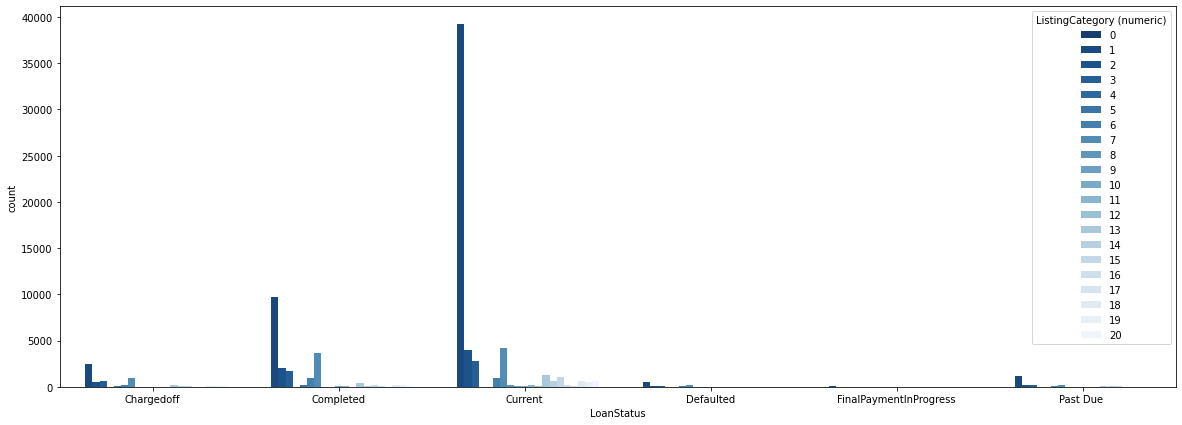

In [68]:
plt.figure(figsize=[20,7])
sb.countplot(data = df, x = 'LoanStatus', hue = 'ListingCategory (numeric)',palette='Blues_r');
plt.savefig("Relation between Loan Status and Listing Category.png")

As we see, Debt consolidation is the higher in all status, Specially current status.

In [25]:
ct_counts = df.groupby(['LoanStatus', 'ListingCategory (numeric)']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'ListingCategory (numeric)', values = 'count')

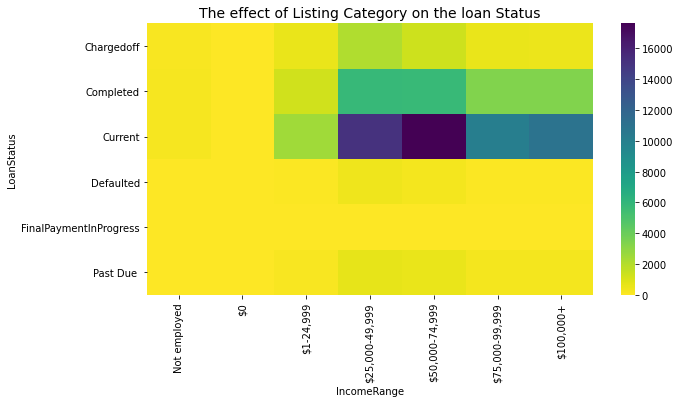

In [69]:
plt.figure(figsize=[10,5])
sb.heatmap(ct_counts,cmap='viridis_r');
plt.title('The effect of Listing Category on the loan Status',fontsize=14);
plt.savefig("Relation2 between Loan Status and Listing Category.png")

As we can see the most of Loans in the Debt Consolidation and some in others listing category and most of them is in Current Loan Staus with some in Completed Status.

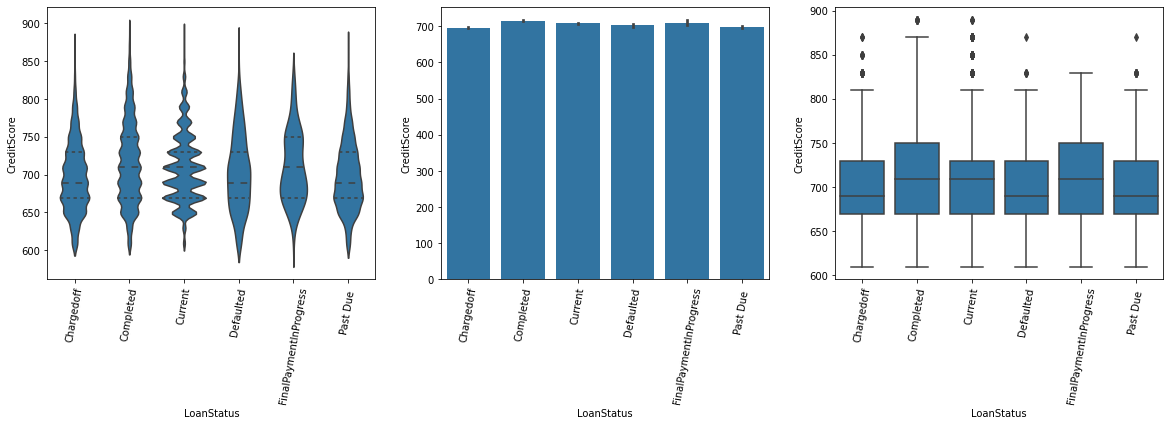

In [70]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sb.violinplot(data=df,x='LoanStatus',y='CreditScore',color=base_color,inner='quartile');
plt.xticks(rotation=80);
plt.subplot(1,3,2)
sb.barplot(data=df,x='LoanStatus',y='CreditScore',color=base_color);
plt.xticks(rotation=80);
plt.subplot(1,3,3)
sb.boxplot(data=df,x='LoanStatus',y='CreditScore',color=base_color);
plt.xticks(rotation=80);
plt.savefig("Relation between Loan Status and Credit Score.png")

It's quite not clear but higher score tends to complete the loan

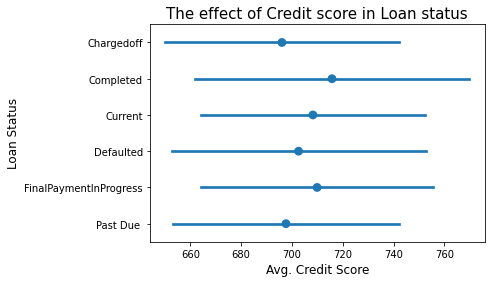

In [71]:
sb.pointplot(data=df,y='LoanStatus',x='CreditScore',ci='sd',linestyles="");
plt.xlabel('Avg. Credit Score',fontsize=12);
plt.ylabel('Loan Status',fontsize=12);
plt.title('The effect of Credit score in Loan status',fontsize=15);
plt.savefig("The effect of Credit score in Loan status.png")

As we see, The Mean credit score doesn't effect the Loan status so much, but we can say that higher score has higher completed loan status.

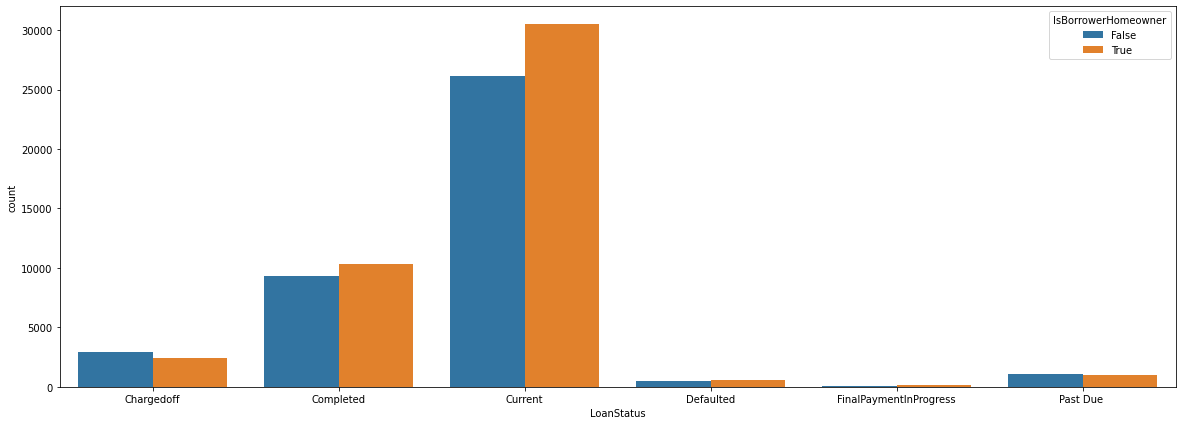

In [72]:
plt.figure(figsize=[20,7])
sb.countplot(data = df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner');
plt.savefig("The effect of Homeowner in Loan status.png")

I see in Current Status there's more home owners. 

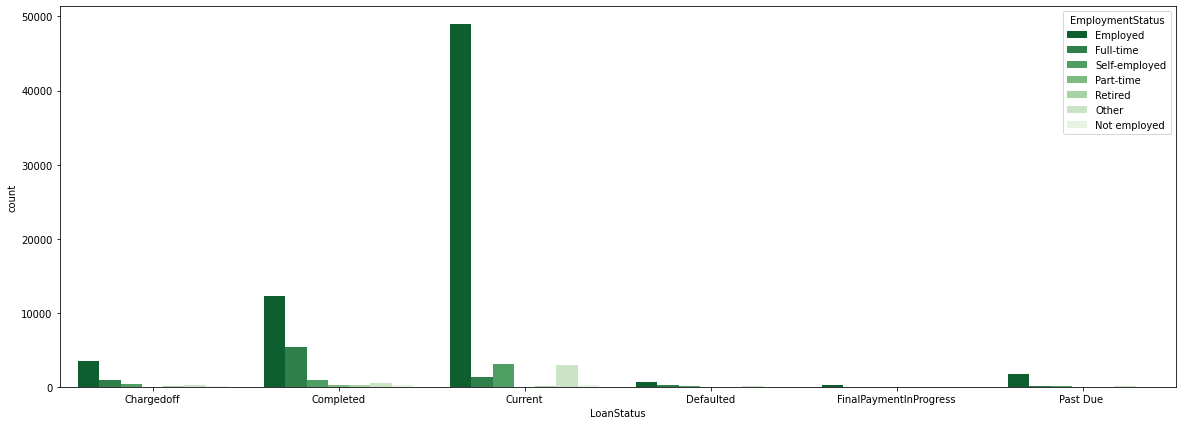

In [73]:
plt.figure(figsize=[20,7])
sb.countplot(data = df, x = 'LoanStatus', hue = 'EmploymentStatus', palette='Greens_r');
plt.savefig("The effect of Employment Status in Loan status(1).png")

It goes to the Employment direction

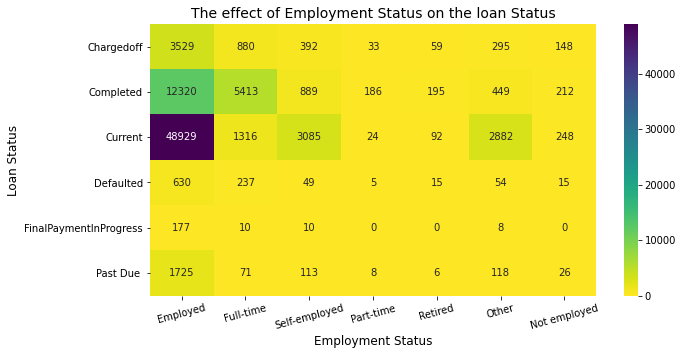

In [74]:
ct_counts = df.groupby(['LoanStatus', 'EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')
plt.figure(figsize=[10,5])
sb.heatmap(ct_counts,cmap='viridis_r',annot=True,fmt='d');
plt.xlabel('Employment Status',fontsize=12)
plt.ylabel('Loan Status',fontsize=12)
plt.title('The effect of Employment Status on the loan Status',fontsize=14);
plt.xticks(rotation=15);
plt.savefig("The effect of Employment Status in Loan status(2).png")

As we can see, The current and Completed status tends to have Employed status

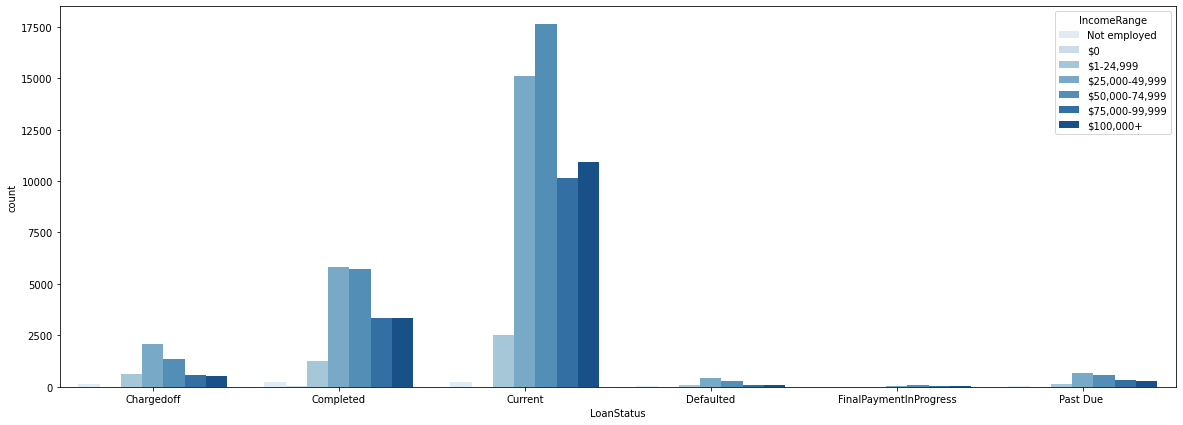

In [75]:
plt.figure(figsize=[20,7])
sb.countplot(data = df, x = 'LoanStatus', hue = 'IncomeRange',palette='Blues');
plt.savefig("The effect of Income Range in the Loan Status.png")

We need some another plots to say that middle class people gets more loans

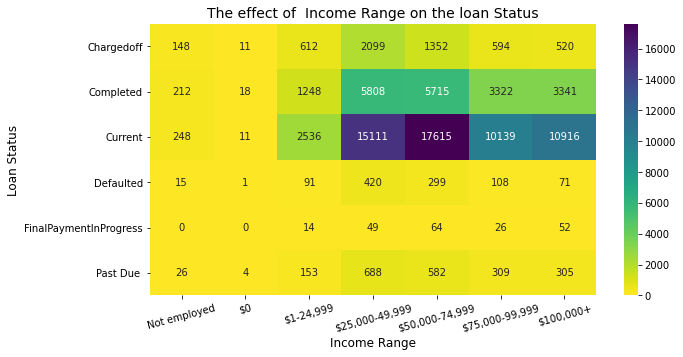

In [76]:
ct_counts = df.groupby(['LoanStatus', 'IncomeRange']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IncomeRange', values = 'count')
plt.figure(figsize=[10,5])
sb.heatmap(ct_counts,cmap='viridis_r',annot=True,fmt='d');
plt.xlabel('Income Range',fontsize=12)
plt.ylabel('Loan Status',fontsize=12)
plt.title('The effect of  Income Range on the loan Status',fontsize=14);
plt.xticks(rotation=15);
plt.savefig("The effect of Income Range in the Loan Status2.png")

I see that the middle class then the rich people gets more loans specially in current Status.

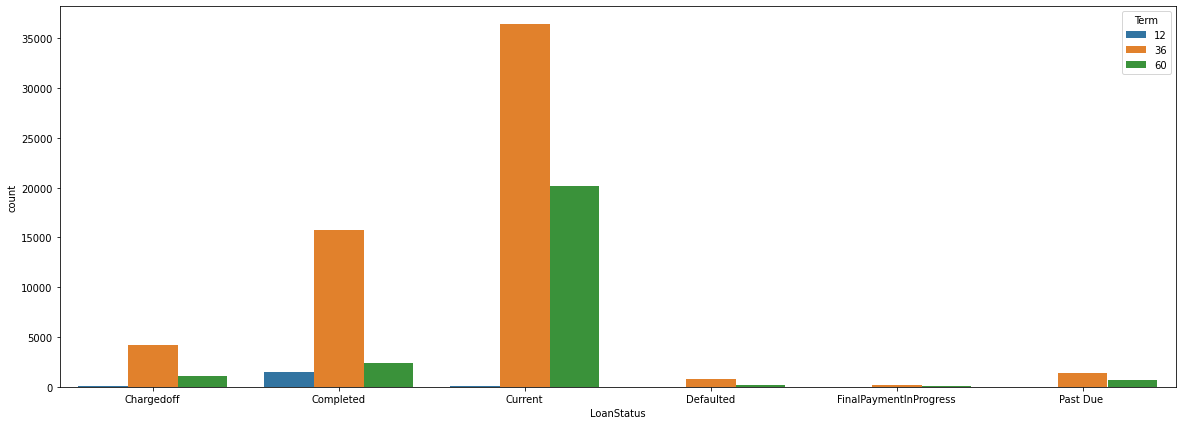

In [77]:
plt.figure(figsize=[20,7])
sb.countplot(data = df, x = 'LoanStatus', hue = 'Term');
plt.savefig("The effect Term in the Loan Status2.png")

people in most status tends to get 36 Months loans then 60 Months.

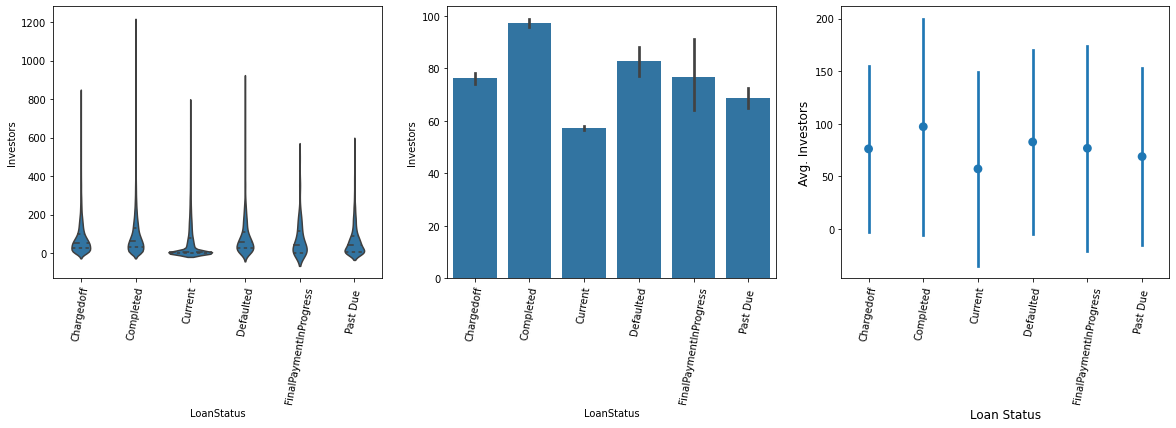

In [78]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sb.violinplot(data=df,x='LoanStatus',y='Investors',color=base_color,inner='quartile');
plt.xticks(rotation=80);
plt.subplot(1,3,2)
sb.barplot(data=df,x='LoanStatus',y='Investors',color=base_color);
plt.xticks(rotation=80);
plt.subplot(1,3,3)
sb.pointplot(data=df,x='LoanStatus',y='Investors',ci='sd',linestyles="");
plt.xticks(rotation=80);
plt.ylabel('Avg. Investors',fontsize=12);
plt.xlabel('Loan Status',fontsize=12);
plt.savefig("Relation between Loan Status and No. of Investors.png")

As we can see the more investors we have the more completed loans we get.

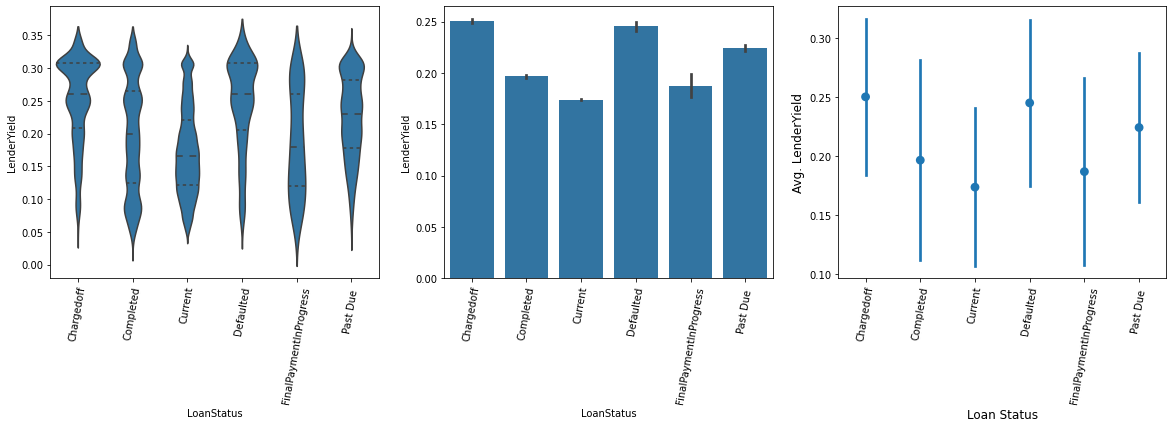

In [79]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sb.violinplot(data=df,x='LoanStatus',y='LenderYield',color=base_color,inner='quartile');
plt.xticks(rotation=80);
plt.subplot(1,3,2)
sb.barplot(data=df,x='LoanStatus',y='LenderYield',color=base_color);
plt.xticks(rotation=80);
plt.subplot(1,3,3)
sb.pointplot(data=df,x='LoanStatus',y='LenderYield',ci='sd',linestyles="");
plt.xticks(rotation=80);
plt.ylabel('Avg. LenderYield',fontsize=12);
plt.xlabel('Loan Status',fontsize=12);
plt.savefig("Relation between Loan Status and Lender Yield.png")

we see that Higher risk Higher interest rate.

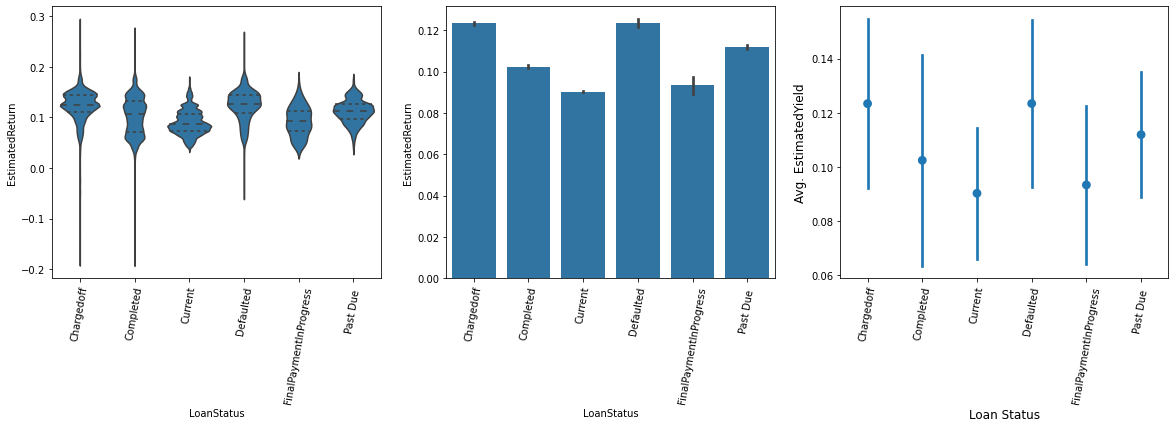

In [80]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sb.violinplot(data=df,x='LoanStatus',y='EstimatedReturn',color=base_color,inner='quartile');
plt.xticks(rotation=80);
plt.subplot(1,3,2)
sb.barplot(data=df,x='LoanStatus',y='EstimatedReturn',color=base_color);
plt.xticks(rotation=80);
plt.subplot(1,3,3)
sb.pointplot(data=df,x='LoanStatus',y='EstimatedReturn',ci='sd',linestyles="");
plt.xticks(rotation=80);
plt.ylabel('Avg. EstimatedYield',fontsize=12);
plt.xlabel('Loan Status',fontsize=12);
plt.savefig("Relation between Loan Status and Estimated Return Rate.png")

As we see there's higher Estimated return with defaulted and charged off Loans Status,
So the higher return involved with higher Loan risk.

In [48]:
def label_loan (row):
   if row['LoanStatus'] == "Chargedoff" :
      return 'D'
   if row['LoanStatus'] == "Past Due " :
      return 'D'
   if row['LoanStatus'] == "FinalPaymentInProgress":
      return 'D'
   else:
        return 'CC'
    
df['Loan'] = df.apply(lambda row: label_loan(row), axis=1)
df['Loan'].value_counts()

CC    77245
D      7608
Name: Loan, dtype: int64

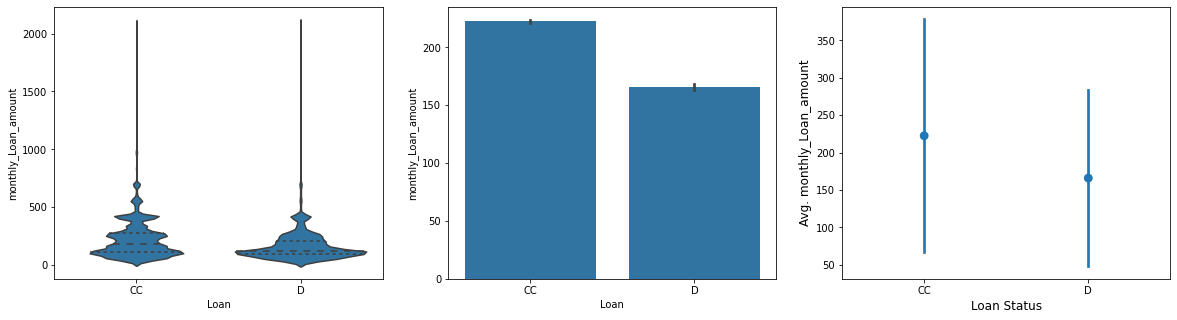

In [81]:
#Feature Engineering
df['monthly_Loan_amount']=df.LoanOriginalAmount/df.Term.astype(int)
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sb.violinplot(data=df,x='Loan',y='monthly_Loan_amount',color=base_color,inner='quartile');
plt.subplot(1,3,2)
sb.barplot(data=df,x='Loan',y='monthly_Loan_amount',color=base_color);
plt.subplot(1,3,3)
sb.pointplot(data=df,x='Loan',y='monthly_Loan_amount',ci='sd',linestyles="");
plt.ylabel('Avg. monthly_Loan_amount',fontsize=12);
plt.xlabel('Loan Status',fontsize=12);
plt.savefig("Relation between Loan Status and Monthly Laon amount.png")

The Current and Completed Loan Status have higher Monthly Loan Amount than other defaulters.

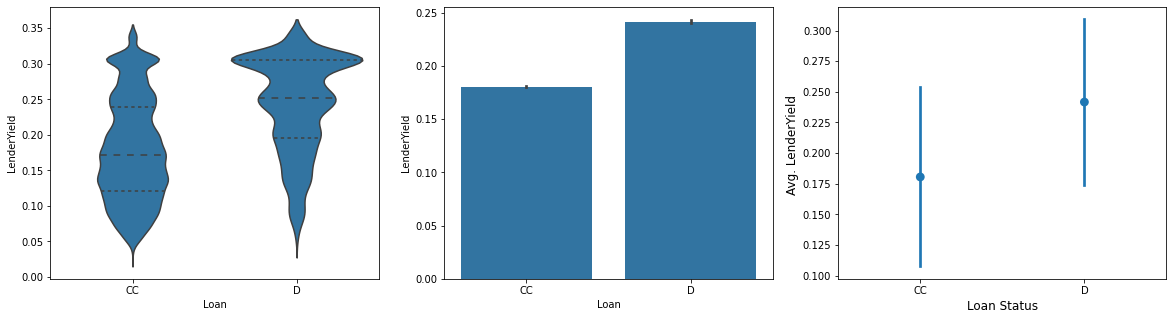

In [92]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sb.violinplot(data=df,x='Loan',y='LenderYield',color=base_color,inner='quartile');
plt.subplot(1,3,2)
sb.barplot(data=df,x='Loan',y='LenderYield',color=base_color);
plt.subplot(1,3,3)
sb.pointplot(data=df,x='Loan',y='LenderYield',ci='sd',linestyles="");
plt.ylabel('Avg. LenderYield ',fontsize=12);
plt.xlabel('Loan Status',fontsize=12);
plt.savefig("Relation between Loan Status and Interest Rate.png")

The CCs have less interest rate than Ds.

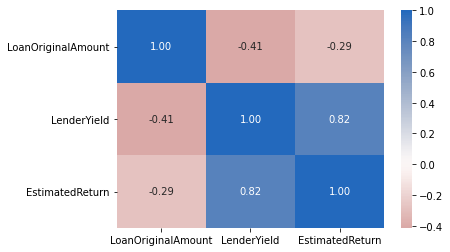

In [82]:
#correlation between Loan Amount,Lender Yield and Estimated Return
sb.heatmap(df[['LoanOriginalAmount','LenderYield','EstimatedReturn']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);
plt.savefig("The Correlation between Loan Amount, Lender Yield and Estimated Return.png")

It seems like we have some strong correlation so we need to see it in scatter plot first to clearly judge. 

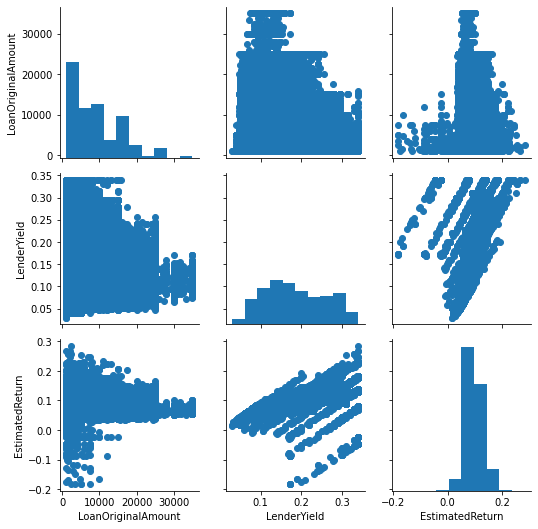

In [83]:
g = sb.PairGrid(data = df, vars = ['LoanOriginalAmount', 'LenderYield', 'EstimatedReturn'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
plt.savefig("The Scatter plots between Loan Amount, Lender Yield and Estimated Return.png")

. There's a Weak Negative correlation between Estimated return and Loan amount.

. There's a Average Negative correlation between Lender Yield and Loan amount.

. There's a Strong Positive correlation between Estimated return and Lender Yield.

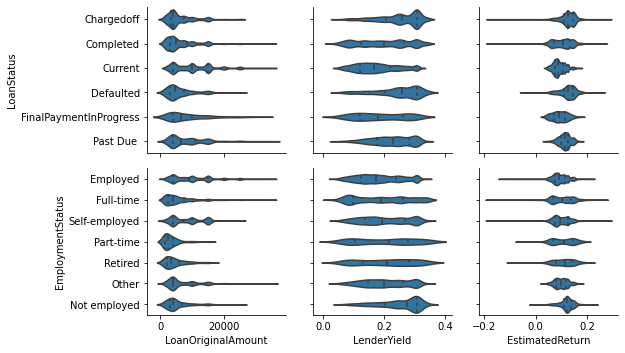

In [84]:
g = sb.PairGrid(data = df, x_vars = ['LoanOriginalAmount', 'LenderYield', 'EstimatedReturn'],
                y_vars = ['LoanStatus','EmploymentStatus'])
g.map(sb.violinplot,color=base_color, inner = 'quartile');
plt.savefig("Relation between Loan Status, EmploymentStatus, LoanOriginalAmount, LenderYield and EstimatedReturn.png")

from the first column we see Higher Loan Amount tends to go to the employment direction and current status.

and from the other two columns we see that the more risk the more gain.

---------------------------------

# MulitVariate Exploration of The Data

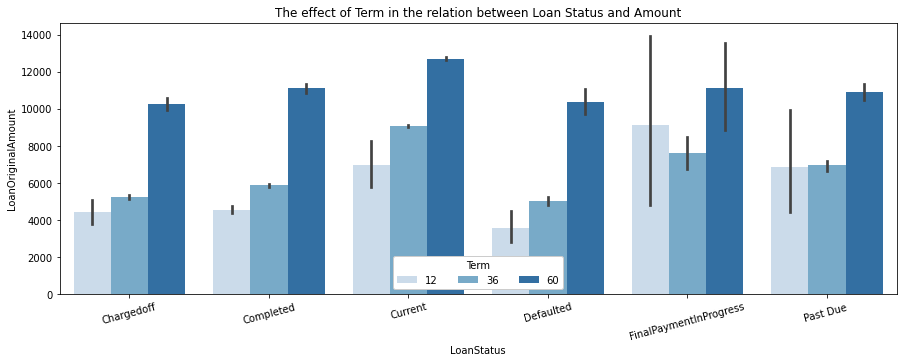

In [88]:
plt.figure(figsize=[15,5])
ax = sb.barplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term',palette='Blues')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Term')
plt.xticks(rotation=15);
plt.title('The effect of Term in the relation between Loan Status and Amount');
plt.savefig("The effect of Term in the relation between Loan Status and Amount.png")

-The bigger loan amount tends to have higher months term.

-The variability is higher in lower months term.

-The Current,Completed and FinalPaymentInProgress Status are the higher Loan amount with higher months term. 

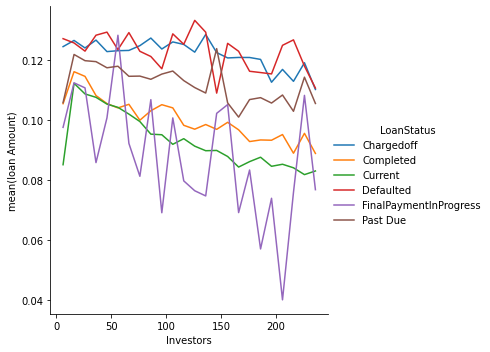

In [41]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(1,250,10)
g = sb.FacetGrid(data = df, hue = 'LoanStatus', size = 5)
g.map(mean_poly, "Investors", "EstimatedReturn", bins = bin_edges)
g.set_ylabels('mean(loan Amount)');
g.add_legend();
#plt.xscale('log')

Defaulted tends to have higher loan amount in average.

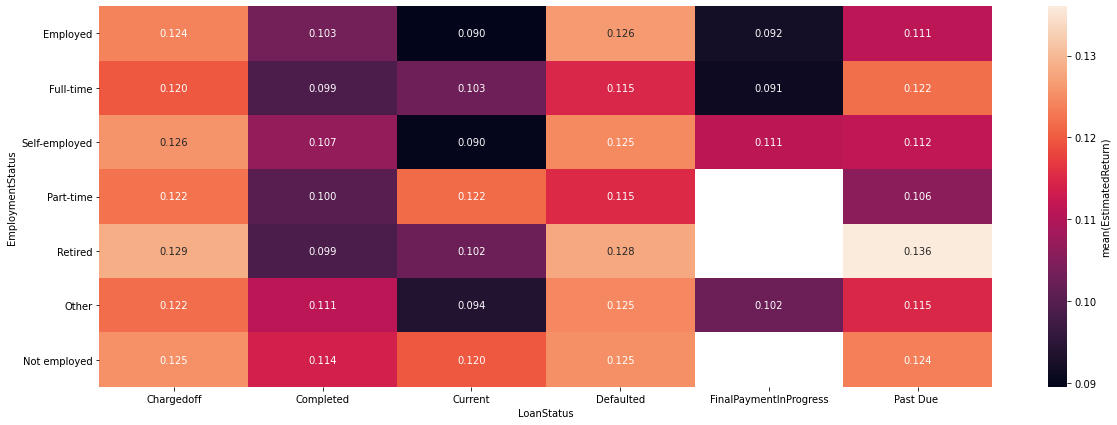

In [89]:
plt.figure(figsize=[20,7])
Loan_means = df.groupby(['LoanStatus', 'EmploymentStatus']).mean()['EstimatedReturn']
Loan_means = Loan_means.reset_index(name = 'EstimatedReturn_avg')
Loan_means = Loan_means.pivot(index = 'EmploymentStatus', columns = 'LoanStatus',
                            values = 'EstimatedReturn_avg')
sb.heatmap(Loan_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(EstimatedReturn)'});
plt.savefig("The effect of Estimated Return Rate in the relation between Loan and Employment Status .png")

As we see all factors that effect the risk tends to have higher Return

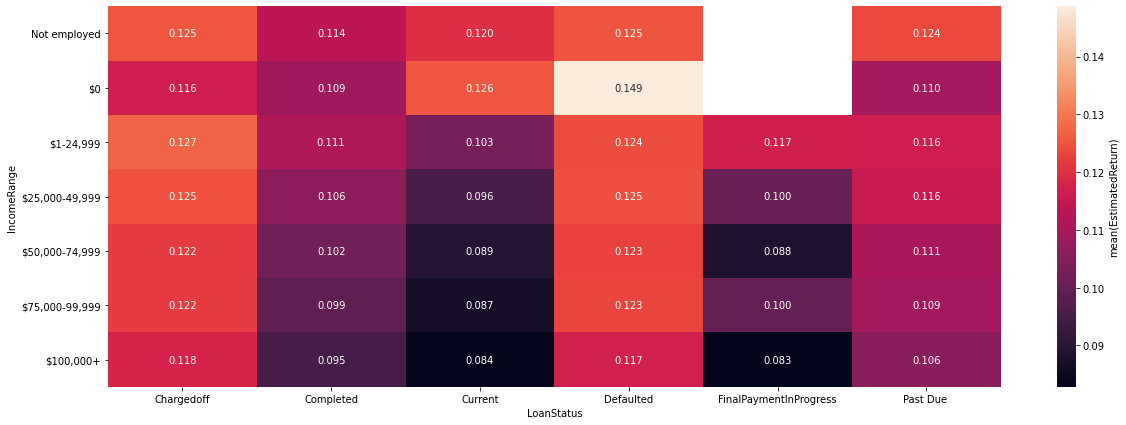

In [90]:
plt.figure(figsize=[20,7])
Loan_means = df.groupby(['LoanStatus', 'IncomeRange']).mean()['EstimatedReturn']
Loan_means = Loan_means.reset_index(name = 'EstimatedReturn_avg')
Loan_means = Loan_means.pivot(index = 'IncomeRange', columns = 'LoanStatus',
                            values = 'EstimatedReturn_avg')
sb.heatmap(Loan_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(EstimatedReturn)'});
plt.savefig("The effect of Estimated Return Rate in the relation between Loan Status and Income Range .png")

High Risk High Return.

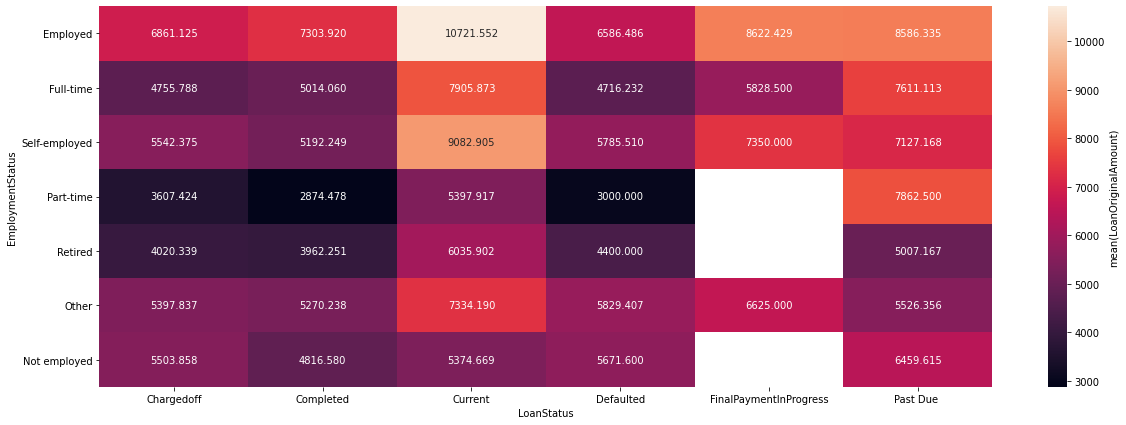

In [91]:
plt.figure(figsize=[20,7])
Loan_means = df.groupby(['LoanStatus', 'EmploymentStatus']).mean()['LoanOriginalAmount']
Loan_means = Loan_means.reset_index(name = 'LoanOriginalAmount_avg')
Loan_means = Loan_means.pivot(index = 'EmploymentStatus', columns = 'LoanStatus',
                            values = 'LoanOriginalAmount_avg')
sb.heatmap(Loan_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(LoanOriginalAmount)'});
plt.savefig("The effect of Loan Amount in the Relation between Loan Status and Income Range.png")

It looks like each Employment status is normally distributed around the current Loan Status,
and higher amount of loans goes to Employment direction.

In [51]:
df.IncomeRange.value_counts()
def label_loan (row):
   if row['IncomeRange'] == "$100,000+" :
      return 'High'
   if row['IncomeRange'] == "$1-24,999" :
      return 'Low'
   if row['IncomeRange'] == "$0" :
      return 'Low'
   if row['IncomeRange'] == "Not employed" :
      return 'Low'
   else:
        return 'Mid'
    
df['Classes'] = df.apply(lambda row: label_loan(row), axis=1)
df['Classes'].value_counts()

Mid     64300
High    15205
Low      5348
Name: Classes, dtype: int64

In [52]:
sedan_classes = ['High', 'Mid', 'Low']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

df['Classes'] = df['Classes'].astype(vclasses);

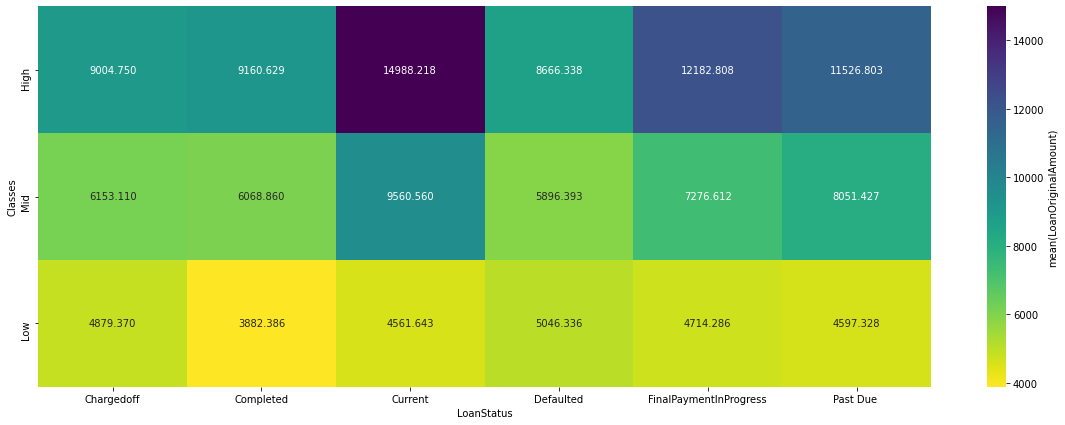

In [93]:
plt.figure(figsize=[20,7])
Loan_means = df.groupby(['LoanStatus', 'Classes']).mean()['LoanOriginalAmount']
Loan_means = Loan_means.reset_index(name = 'LoanOriginalAmount_avg')
Loan_means = Loan_means.pivot(index = 'Classes', columns = 'LoanStatus',
                            values = 'LoanOriginalAmount_avg')
sb.heatmap(Loan_means, annot = True, fmt = '.3f',cmap='viridis_r',
           cbar_kws = {'label' : 'mean(LoanOriginalAmount)'});
plt.savefig("The effect of Loan Amount in the Relation between Loan Status and Social Classes.png")

As we see, The High class takes high Loan Amount in average and it goes down as we go to lower income rate

most of High class --> Current Status then  final payment in progress

most of Mid class --> Current Status then past due.

most of low class --> Defaulted Status then charged off.

---------------------------------------------------------

### Some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- The Social class effect the Loan status directly and we can see that from the IncomeRange and EmploymentStatus

- The amount of the loan effect the loan status too.

- The interest rate is related to the estimated return and effect the loan status. 

### Were there any interesting or surprising interactions between features?

I got That bankers are fraudulent and has high procurment, and thats why ?


Check my comments under each plot and you will know why :)